<a href="https://colab.research.google.com/github/rajivdahal/10daysml/blob/master/Linear_regression%2C_lasso_and_ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [7]:
csv_dataframe = pd.read_csv("/content/HousingData.csv")

In [8]:
csv_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
#Converting the dataframe to dictionalry of numpy arrays
data_array = csv_dataframe.values
headers = list(csv_dataframe.columns)
original_boston_dataset_from_sklearn = {'data':data_array, 'features':headers}
original_boston_dataset_from_sklearn

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
         2.4000e+01],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
         2.1600e+01],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
         3.4700e+01],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
         2.3900e+01],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
         2.2000e+01],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
         1.1900e+01]]),
 'features': ['CRIM',
  'ZN',
  'INDUS',
  'CHAS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT',
  'MEDV']}

In [19]:
#Converting the array to pandas dataframe
df = pd.DataFrame(original_boston_dataset_from_sklearn['data'])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [20]:
#adding headers to dataframe
df.columns = original_boston_dataset_from_sklearn['features']
# df = pd.DataFrame(original_boston_dataset_from_sklearn['data'], columns =original_boston_dataset_from_sklearn['features'])
#You can also do aboive code

In [17]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [21]:
#Here MEDV is the price so I want to rename the column name MEDV to Price
df.rename(columns={"MEDV":"Price"}, inplace=True)

In [22]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [24]:
###Divide the dataset into independent and dependent features
X = df.iloc[:,:-1] #Select all rows, Select all columns but skip last column
y = df.iloc[:,-1]
X,y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
 505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050  1.0  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   

In [27]:
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [28]:
regressor = LinearRegression()

In [31]:
mse = cross_val_score(regressor,X,y,scoring='neg_mean_squared_error',cv=5)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 678, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1146, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 957, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 122, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 171, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [32]:
##Our modal contains NaN so we have to drop the X_value
X=X.dropna()
y=y[X.index]

In [33]:
mse = cross_val_score(regressor,X=X,y=y,scoring='neg_mean_squared_error',cv=5)
#neg_mean_squared_error is just a negative sign ion mean squared error

In [34]:
mse

array([-10.63567609, -19.59943115, -32.05270837, -65.52790586,
       -27.5051987 ])

In [36]:
np.mean(mse)

-31.064184034019682

**Ridge regression**

In [37]:
from sklearn.linear_model import Ridge

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
ridge = Ridge()

In [43]:
parameters = {'alpha':[1e-15,1e-8,1e-3,1e-2,1,5,10,20,30,40,50]}

In [44]:
#To select best lambda value we use GridSearchCV
ridge_regressor = GridSearchCV(ridge,parameters, scoring="neg_mean_squared_error", cv=5, verbose=1)

In [45]:
ridge_regressor.fit(X,y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30,
                                   40, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [46]:
ridge_regressor.best_params_

{'alpha': 50}

In [47]:
ridge_regressor.best_score_

-28.04371988665905

**Lasso Regressor**

In [53]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-8,1e-3,1e-2,1,5,10,20,30,40,50]}
lasso_regressor = GridSearchCV(lasso,parameters, scoring="neg_mean_squared_error", cv=5, verbose=1)
lasso_regressor.fit(X,y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.359e+03, tolerance: 3.054e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.065e+03, tolerance: 2.577e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.765e+03, tolerance: 1.976e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30,
                                   40, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [54]:
lasso_regressor.best_params_

{'alpha': 0.01}

In [55]:
lasso_regressor.best_score_

-30.511804455510322

**Elastic net regressor**

In [59]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic_net = ElasticNet()
parameters = {'alpha':[1e-15,1e-8,1e-3,1e-2,1,5,10,20,30,40,50]}
elastic_net_regressor = GridSearchCV(elastic_net,parameters, scoring="neg_mean_squared_error", cv=5, verbose=1)
elastic_net_regressor.fit(X,y)



Fitting 5 folds for each of 11 candidates, totalling 55 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.320e+03, tolerance: 3.054e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.065e+03, tolerance: 2.577e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.836e+03, tolerance: 1.976e

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30,
                                   40, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [61]:
elastic_net_regressor.best_params_


{'alpha': 0.01}

In [62]:
elastic_net_regressor.best_score_

-29.775774764345424

Above best score is the best minimum gradient descent created

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [77]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)
prediction_elastic_net = elastic_net_regressor.predict(X_test)

In [67]:
prediction_lasso

array([25.15982836, 26.11583521, 22.27462968, 16.31995238, 13.23833341,
       30.51074623, 20.91421867, 21.71217904, 26.14036689, 22.43191566,
       21.21115754,  6.23226365, 17.40382042, 12.70155419, 29.02998171,
       31.71990808, 21.06556427,  9.86707872, 45.18112467, 43.51991021,
       13.89379048, 13.51745786, 25.55829482, 13.92344737, 34.27953979,
       10.05920764, 19.73037714, 16.49862378,  4.0873234 , 20.4495127 ,
       17.61585154, 35.71999473, 28.36650765,  6.52340313, 24.66241423,
       24.28361526, 10.00373952, 19.67864705, 11.91313239, 20.3771826 ,
       33.15742746, 24.42648689, 19.85758702, 18.33374192, 17.42991062,
       20.07655506, 31.70294441, 18.64927101, 15.18326855, 13.5746184 ,
       25.95318387, 34.49057645,  8.25377383, 25.08058686, 18.1666118 ,
       34.8157924 , 16.68880114, 16.76469566, 12.84718056, 35.60976361,
       21.36927273, 25.16062377, 32.46539217, 15.4523393 ,  8.84458707,
       17.50930442, 32.80740551, 39.75845936, 19.06818624, 20.63

In [68]:
prediction_ridge

array([25.15982836, 26.11583521, 22.27462968, 16.31995238, 13.23833341,
       30.51074623, 20.91421867, 21.71217904, 26.14036689, 22.43191566,
       21.21115754,  6.23226365, 17.40382042, 12.70155419, 29.02998171,
       31.71990808, 21.06556427,  9.86707872, 45.18112467, 43.51991021,
       13.89379048, 13.51745786, 25.55829482, 13.92344737, 34.27953979,
       10.05920764, 19.73037714, 16.49862378,  4.0873234 , 20.4495127 ,
       17.61585154, 35.71999473, 28.36650765,  6.52340313, 24.66241423,
       24.28361526, 10.00373952, 19.67864705, 11.91313239, 20.3771826 ,
       33.15742746, 24.42648689, 19.85758702, 18.33374192, 17.42991062,
       20.07655506, 31.70294441, 18.64927101, 15.18326855, 13.5746184 ,
       25.95318387, 34.49057645,  8.25377383, 25.08058686, 18.1666118 ,
       34.8157924 , 16.68880114, 16.76469566, 12.84718056, 35.60976361,
       21.36927273, 25.16062377, 32.46539217, 15.4523393 ,  8.84458707,
       17.50930442, 32.80740551, 39.75845936, 19.06818624, 20.63

In [65]:
import seaborn as sns

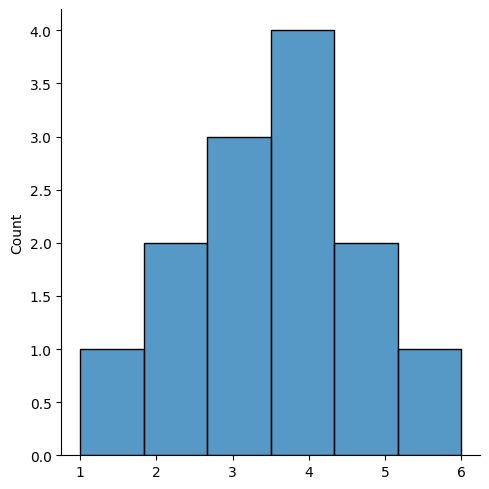

In [69]:
#We are using distribution plot to visualize distribution of predicted dataset but before that let us understand about distribution plot of seaborn
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6]
sns.displot(data)

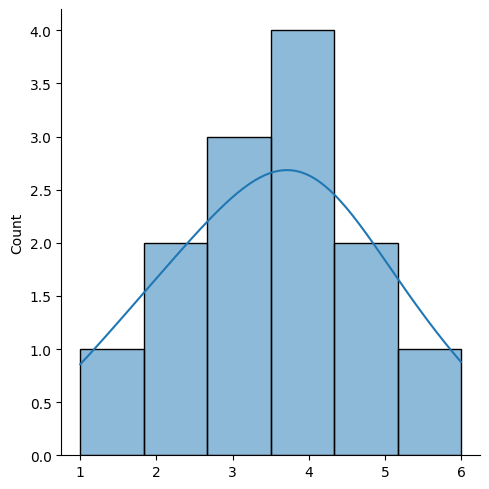

In [71]:
sns.displot(data, kde=True)
#KDE stands for kernel density estimate, it plots the graph

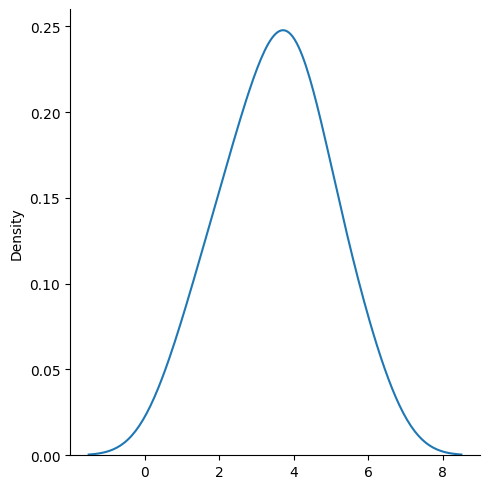

In [72]:
sns.displot(data, kind="kde")

**Let us visualize the predicted data from X_test**

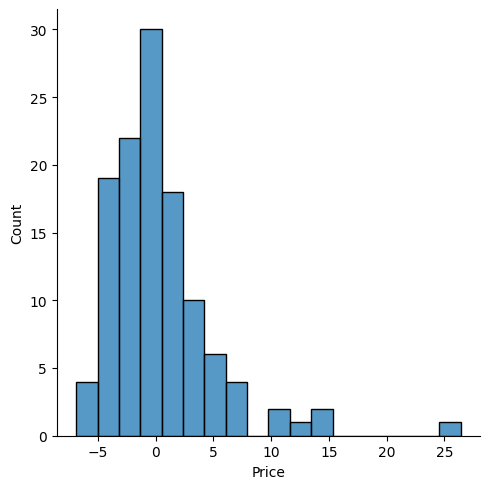

In [73]:
sns.displot(y_test-prediction_lasso)

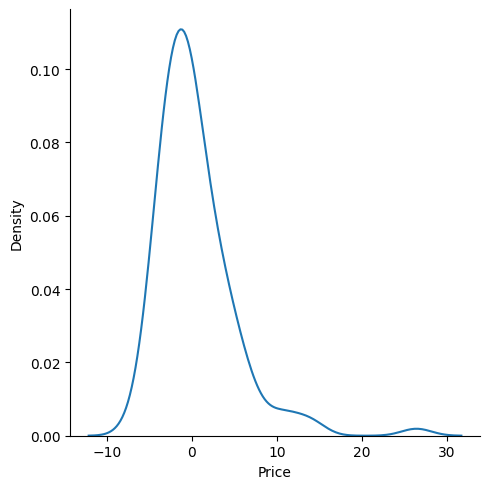

In [74]:
sns.displot(y_test-prediction_lasso,kind="kde")

THe data seems right skewed, concentration of data is more on the right side; in left skewed **Mean > median > mode** mean is on the rightmost side, median in between and the mode is on the left side  where the end point of convex curve is seen


Opposite is the case for left skewed

In perfectly normal distributed data mean = median = mode

**We are subtracting y-test and y-pred because y-test - y-pred is error and error seems to be in normal distribution and the variance is between -10 to 10**

Let us visualize the data for y_test

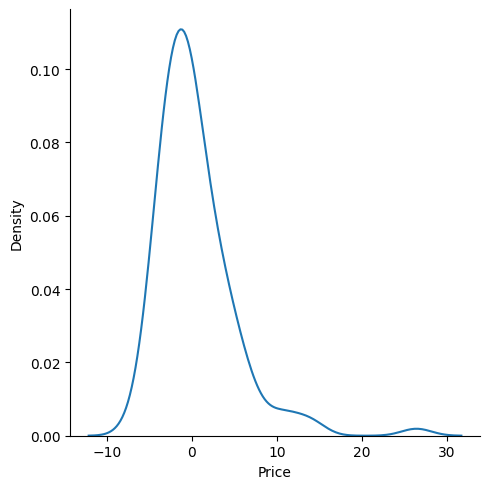

In [76]:
sns.displot(y_test-prediction_ridge,kind="kde")

**Let us visualize for elastic net regression predicted**

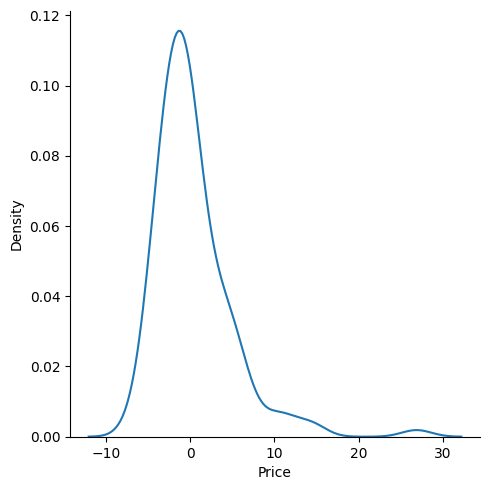

In [78]:
sns.displot(y_test-prediction_elastic_net,kind="kde")

**Let us evaluate the models with performance metrics**

In [79]:
from sklearn.metrics import r2_score

In [80]:
r2_score(y_true=y_test,y_pred=prediction_ridge)

0.7863556137102685

In [81]:
r2_score(y_true=y_test,y_pred=prediction_lasso)

0.7863556137102685

In [82]:
r2_score(y_true=y_test,y_pred=prediction_elastic_net)

0.7841620035875292

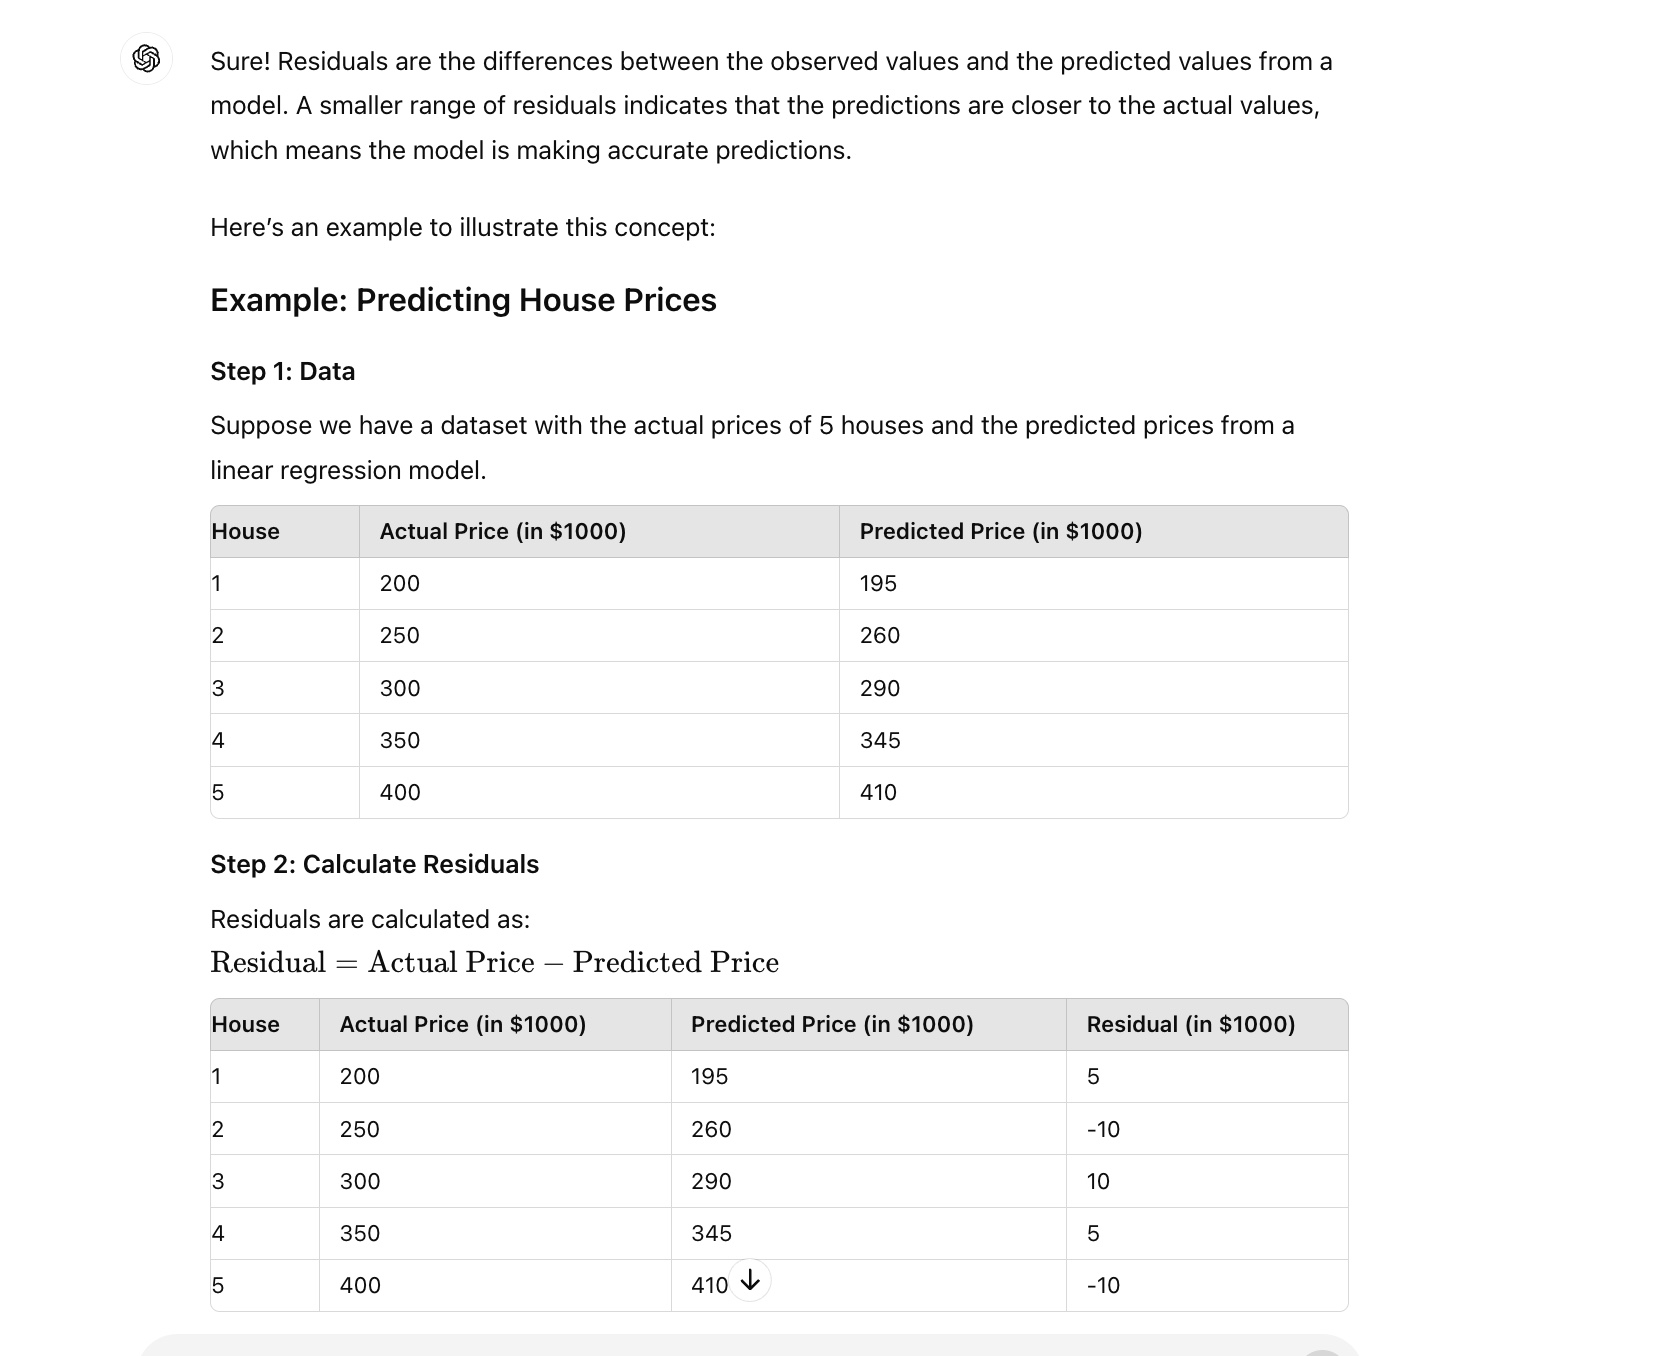


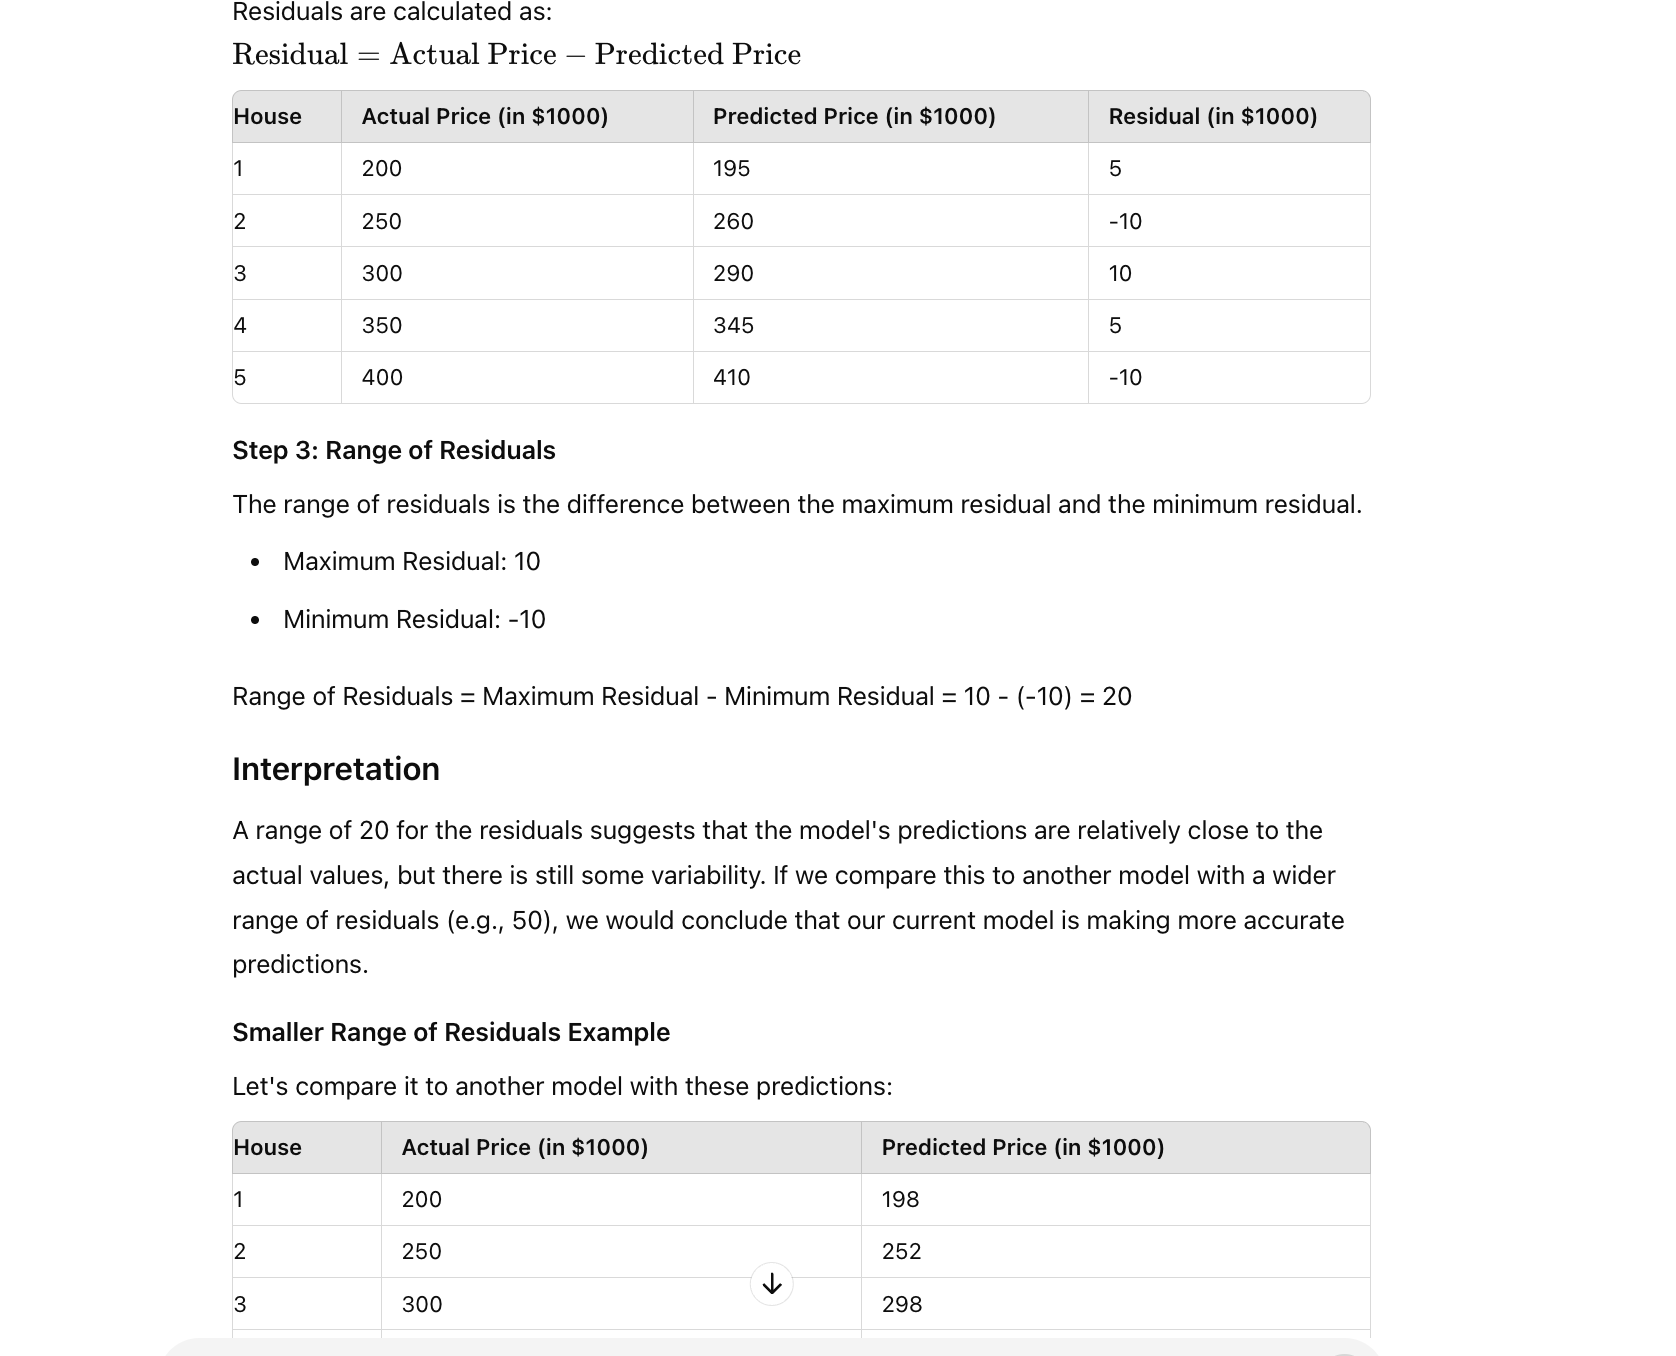